In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
new_names = ['sepal_length','sepal_width','petal_length','petal_width','iris_class']
dataset = pd.read_csv(url, names=new_names, skiprows=0, delimiter=',')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   iris_class    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
dataset.head(6)

,sepal_length,sepal_width,petal_length,petal_width,iris_class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa


In [ ]:
dataset.iris_class.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: iris_class, dtype: int64

In [ ]:
y = dataset['iris_class']
x = dataset.drop(['iris_class'], axis=1)

print ("dataset : ",dataset.shape)
print ("x : ",x.shape)
print ("y : ",y.shape)

dataset :  (150, 5)
x :  (150, 4)
y :  (150,)


In [ ]:
#one hot encoding
y=pd.get_dummies(y)
y.sample(7)

,Iris-setosa,Iris-versicolor,Iris-virginica
37,1,0,0
95,0,1,0
91,0,1,0
2,1,0,0
81,0,1,0
147,0,0,1
96,0,1,0


In [ ]:
#Selective import Scikit Learn
from sklearn.model_selection import train_test_split

# Generate Training and Validation Sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3) #0.3 data as data test

#converting to float 32bit
x_train = np.array(x_train).astype(np.float32)
x_test  = np.array(x_test).astype(np.float32)
y_train = np.array(y_train).astype(np.float32)
y_test  = np.array(y_test).astype(np.float32)

#print data split for validation
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(105, 4) (105, 3)
(45, 4) (45, 3)


In [ ]:
#Importing our model
from sklearn.neural_network import MLPClassifier

#model initialization
Model = MLPClassifier(hidden_layer_sizes=(10,5), max_iter=2000, alpha=0.01, #try change hidden layer
                     solver='sgd', verbose=1,  random_state=121) #try verbode=0 to train with out logging
#train our model
h=Model.fit(x_train,y_train)
#use our model to predict
y_pred=Model.predict(x_test)

Iteration 1, loss = 2.62491626
Iteration 2, loss = 2.58142197
Iteration 3, loss = 2.52428789
Iteration 4, loss = 2.45861913
Iteration 5, loss = 2.39114182
Iteration 6, loss = 2.32487890
Iteration 7, loss = 2.26159368
Iteration 8, loss = 2.20198390
Iteration 9, loss = 2.14733603
Iteration 10, loss = 2.09827475
Iteration 11, loss = 2.05494160
Iteration 12, loss = 2.01835459
Iteration 13, loss = 1.98811314
Iteration 14, loss = 1.96337233
Iteration 15, loss = 1.94438117
Iteration 16, loss = 1.93003296
Iteration 17, loss = 1.91984636
Iteration 18, loss = 1.91244803
Iteration 19, loss = 1.90694084
Iteration 20, loss = 1.90286654
Iteration 21, loss = 1.89955253
Iteration 22, loss = 1.89644269
Iteration 23, loss = 1.89319762
Iteration 24, loss = 1.88963141
Iteration 25, loss = 1.88564826
Iteration 26, loss = 1.88128363
Iteration 27, loss = 1.87662507
Iteration 28, loss = 1.87177853
Iteration 29, loss = 1.86673788
Iteration 30, loss = 1.86146728
Iteration 31, loss = 1.85607721
Iteration 32, los

In [ ]:
#scikit for machine learning reporting
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

print(classification_report(y_test,y_pred)) # Print summary report
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))) # Print Confusion matrix
print('accuracy is ',accuracy_score(y_pred,y_test)) # Print accuracy score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.94      0.92        18
           2       1.00      0.93      0.96        14

   micro avg       0.96      0.96      0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45
 samples avg       0.94      0.96      0.95        45

[[13  0  0]
 [ 1 17  0]
 [ 0  2 12]]
accuracy is  0.9333333333333333


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
!cat '0.9333333333333333' > aaa.txt

0.9333333333333333

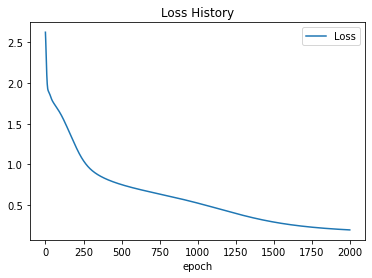

In [ ]:
import matplotlib.pyplot as plt

plt.plot(h.loss_curve_)
plt.title('Loss History')
plt.xlabel('epoch')
plt.legend(['Loss'])